<font size=7> Raw Data Analysis - start 9 seconds

<font color="red">

**NOTE:** To run this notebook you need to create a codespace with 64gb of RAM

Create the spectrogram

# Set up

In [2]:
import pickle
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves, cwt_spectrogram, spectrogram_plot, butter_filter
from human_hip.spike_data import read_autocurated_data, plot_raster
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [3]:
import pywt             # used by cwt_spectrogram

# Packages for plotting spectrogram
from scipy import ndimage
from matplotlib.colors import LogNorm #Normalize
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [4]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid1_start9s_stop28s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate'])
(1009, 19000)


In [5]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

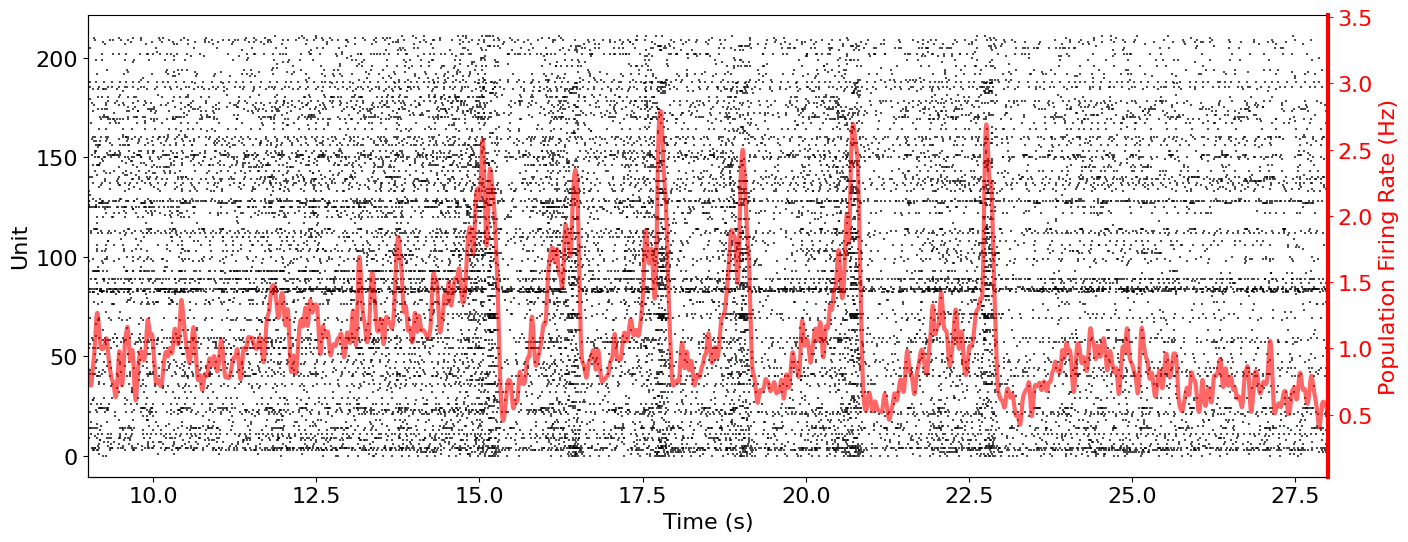

In [6]:
plot_raster(sd, xlim=(9,28))

In [7]:
data = get_brain_waves( data_raw["data"], data_raw["frame_rate"] )#[wave_type]  # get common brain waves


# make spectrogram - electrode 0

Text(0.5, 1.0, 'Electrode Spatial Locations')

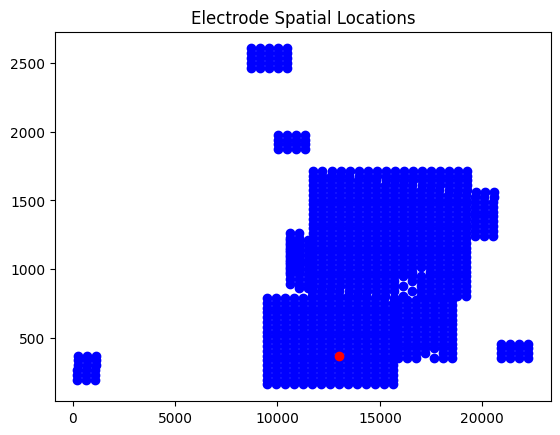

In [8]:
plt.scatter( data_raw["xy"][:,0] , data_raw["xy"][:,1], c="blue" )
plt.scatter( data_raw["xy"][0,0] , data_raw["xy"][0,1], c="red" )
plt.title("Electrode Spatial Locations")

In [52]:
power, times, frequencies, coif = cwt_spectrogram( data["basic"][0,:],  data_raw["frame_rate"], nNotes=12)

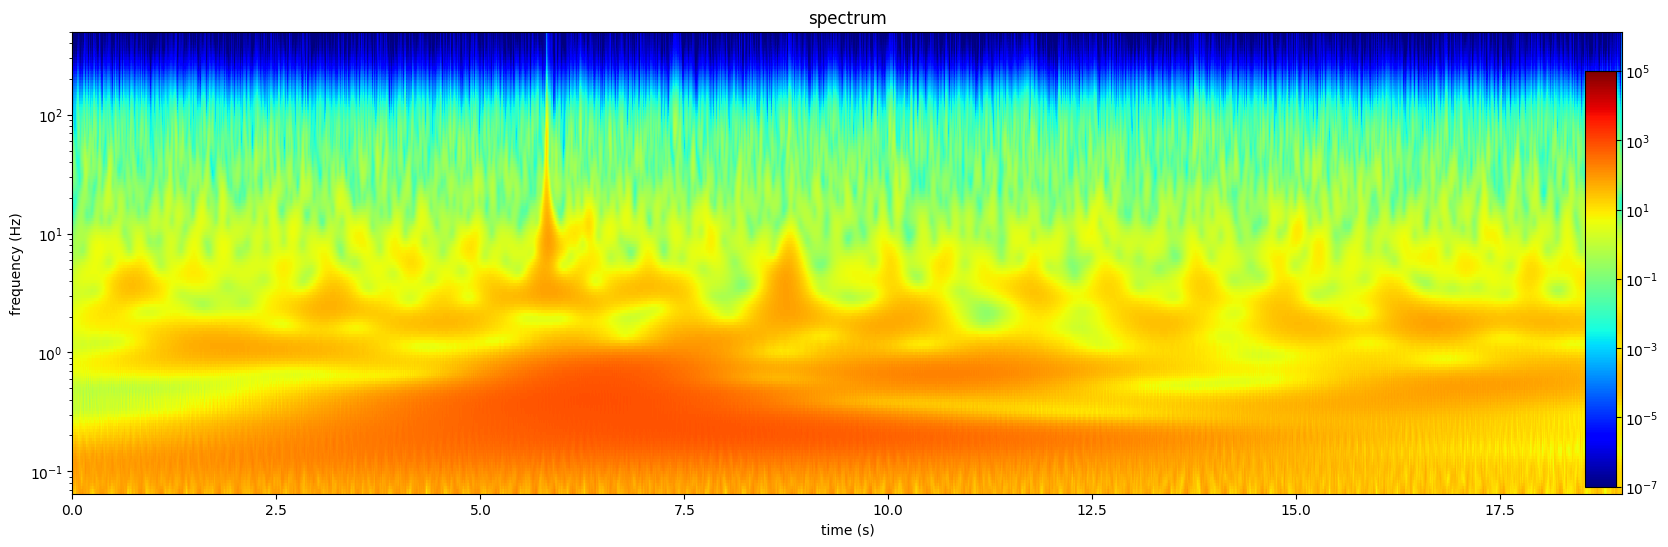

In [53]:
#print(i, channel,raw_trace.shape)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
spectrogram_plot(power, times, frequencies, coif, ax=axs)

axs.set_title(f"spectrum", fontsize=12)
#axs.set_xlim(0, len(data1_lfp)/fs ) # code causes errors
#axs.set_ylim(0, 100)
axs.set_xlabel('time (s)')
axs.set_ylabel('frequency (Hz)')
axs.set_yscale('log')
#axs.set_ylim(1,120)
plt.show(block=False)

# make spectrogram - electrode 19

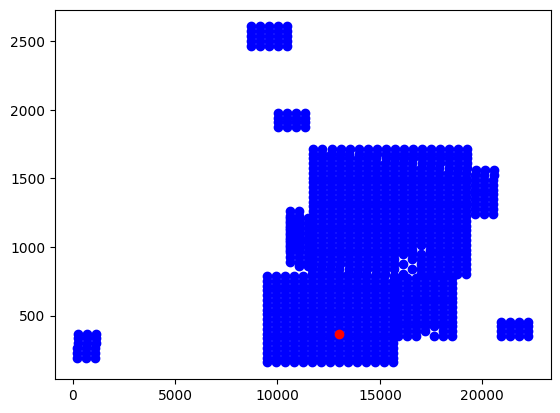

In [31]:
plt.scatter( data_raw["xy"][:,0] , data_raw["xy"][:,1], c="blue" )
plt.scatter( data_raw["xy"][0,0] , data_raw["xy"][0,1], c="red" )

In [34]:
data = get_brain_waves( data_raw["data"], data_raw["frame_rate"] )#[wave_type]  # get common brain waves

In [35]:
power, times, frequencies, coif = cwt_spectrogram( data["basic"][19,:],  data_raw["frame_rate"], nNotes=12)



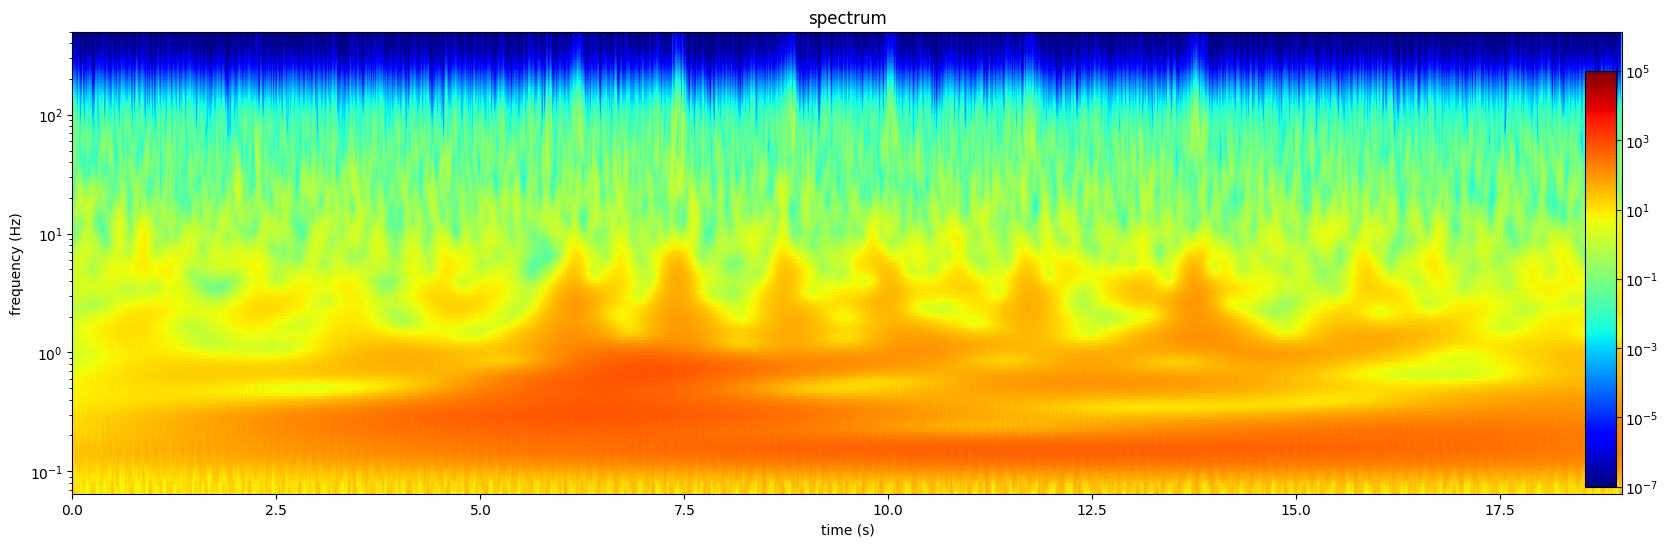

In [20]:
#print(i, channel,raw_trace.shape)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
spectrogram_plot(power, times, frequencies, coif, ax=axs)

axs.set_title(f"spectrum", fontsize=12)
#axs.set_xlim(0, len(data1_lfp)/fs ) # code causes errors
#axs.set_ylim(0, 100)
axs.set_xlabel('time (s)')
axs.set_ylabel('frequency (Hz)')
axs.set_yscale('log')
#axs.set_ylim(1,120)
plt.show(block=False)

# Plot Firing Rate Spectrogram

Text(0.5, 0, 'Time (s)')

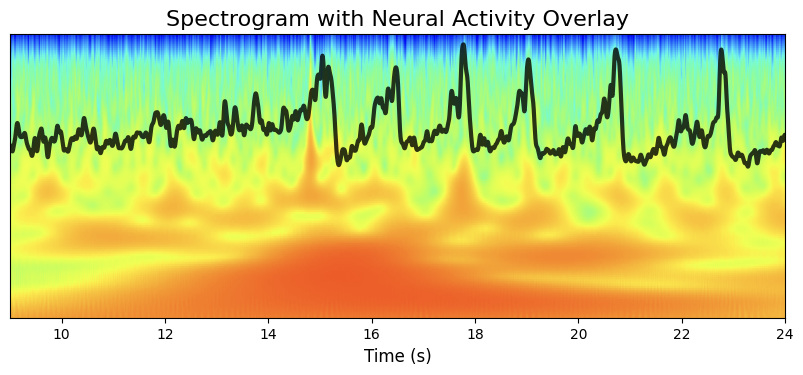

In [19]:
fig, axs =  plt.subplots(1, 1, figsize=(10, 6) )

pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=20)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
plt.plot(bins/1000, pop_fr, color="black", linewidth=3, alpha=0.8)

# add title
plt.title("Spectrogram with Neural Activity Overlay", fontsize=16)
img = plt.imread("spectrogram.png")      # Load in image
plt.imshow(img,  extent=[9, 28, -3, 3.5]) # Plot image, have it correspond to electrode dimensions

#plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

plt.xlim(9,24)
plt.ylim(-2.5,3)
#axs.set_xticks([])
axs.set_yticks([])
axs.set_xlabel("Time (s)", fontsize=12)
